In [11]:
import numpy as np 
import math 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv('entropy.csv')
data.head()

,name,age,apple_pie,potato_salad,sushi,midwest
0,jeff,32,0,1,1,1
1,pete,25,1,1,0,1
2,anne,33,1,1,0,1
3,natalie,26,0,0,1,1
4,stella,30,1,1,1,1


In [3]:
def calculate_entropy(column):
    counts = np.bincount(column)
    probabilities = counts/len(column)
    
    entropy = 0

    for prob in probabilities:
        entropy += prob*math.log(prob, len(probabilities))

    return -entropy

In [4]:
calculate_entropy(data.midwest)

0.8366407419411673

In [5]:
def calculate_information_gain(data, split_name, target_name):
    original_entropy = calculate_entropy(data[target_name])

    values = data[split_name].unique()
    splits = []
    for i in range(len(values)):
        splits.append(data[data[split_name] == values[i]])

    to_subtract = 0
    for subset in splits:
        prob = (subset.shape[0]/data.shape[0])
        to_subtract += prob*calculate_entropy(subset[target_name])
    
    return original_entropy-to_subtract 

In [6]:
def highest_information_gain(data, split_names_list, target_name):
    best_information_gain = 0
    best_split = ' '

    for split_name in split_names_list:
        split_information_gain = calculate_information_gain(data, split_name, target_name)
        if split_information_gain > best_information_gain:
            best_split = split_name
            best_information_gain = calculate_information_gain(data, split_name, target_name)

    print(f'Best split on: {best_split}')
    print(f'Information gained: {best_information_gain}')
    print()

    values = data[best_split].unique()
    for i in range(len(values)):
        split_data = data[data[best_split] == values[i]]
        print(split_data)
        print(f'Entropy: {calculate_entropy(split_data[target_name])}')
        print() 

In [7]:
print(data)
print(f'Entropy of the dataset before splits: {calculate_entropy(data.midwest)}')
print()
highest_information_gain(data, ['apple_pie', 'sushi', 'potato_salad'], 'midwest')

       name  age  apple_pie  potato_salad  sushi  midwest
0      jeff   32          0             1      1        1
1      pete   25          1             1      0        1
2      anne   33          1             1      0        1
3   natalie   26          0             0      1        1
4    stella   30          1             1      1        1
5       rob   25          1             0      0        1
6       joe   42          1             1      0        1
7       jim   38          1             1      0        1
8      lisa   36          1             1      0        0
9     sarah   29          1             0      1        0
10    david   35          1             0      0        1
11     eric   28          1             1      1        0
12     mike   20          0             1      0        1
13    karen   38          1             0      0        1
14    megan   31          0             0      1        0
Entropy of the dataset before splits: 0.8366407419411673

Best split on:

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
model = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=3)

In [9]:
x = data[['apple_pie', 'potato_salad', 'sushi']]
y = data.midwest
model.fit(x, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

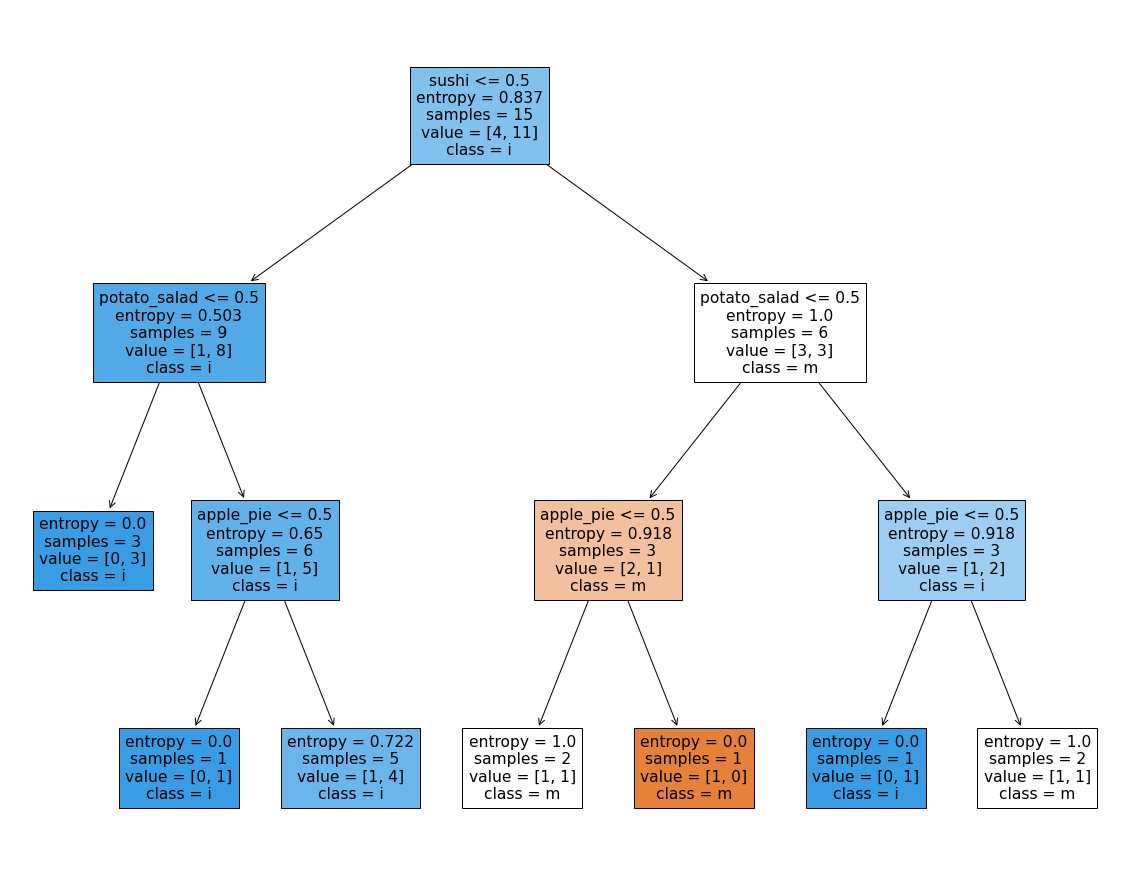

In [12]:
fig = plt.figure(figsize=(20,16))
tree.plot_tree(model, feature_names=['apple_pie', 'potato_salad', 'sushi'], class_names='midwest', filled=True)
plt.show()